In [51]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the data
df = pd.read_csv('/Users/sanikapoyekar/employee-attrition-prediction/data/employee_attrition.csv')

# 3. Initial data check
print(df.shape)
df.head()
df.info()

# 4. Missing values
df.isnull().sum()

# 5. Convert 'Attrition' to binary
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# 6. Encode categoricals (optional for now)
# Use get_dummies or LabelEncoder in future step


(1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel     

In [2]:
# Descriptive statistics
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64


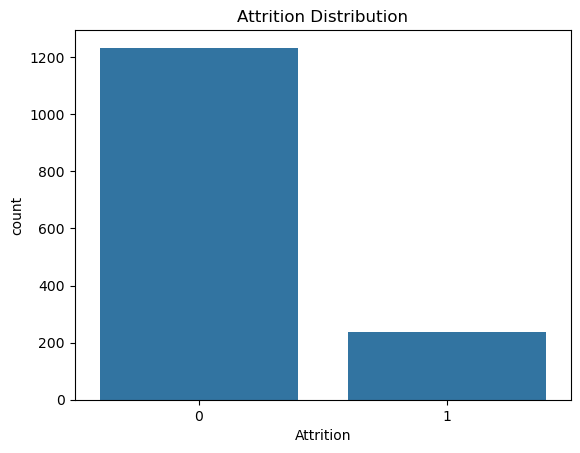

In [60]:
# Check target variable balance
attrition_rate = df['Attrition'].value_counts(normalize=True)
print(attrition_rate)

sns.countplot(data=df, x='Attrition')
plt.title("Attrition Distribution")
# Save the plot before showing or clearing it
plt.savefig('/Users/sanikapoyekar/employee-attrition-prediction/images/Attrition_Distribution.png', bbox_inches='tight')

# Show plot
plt.show()


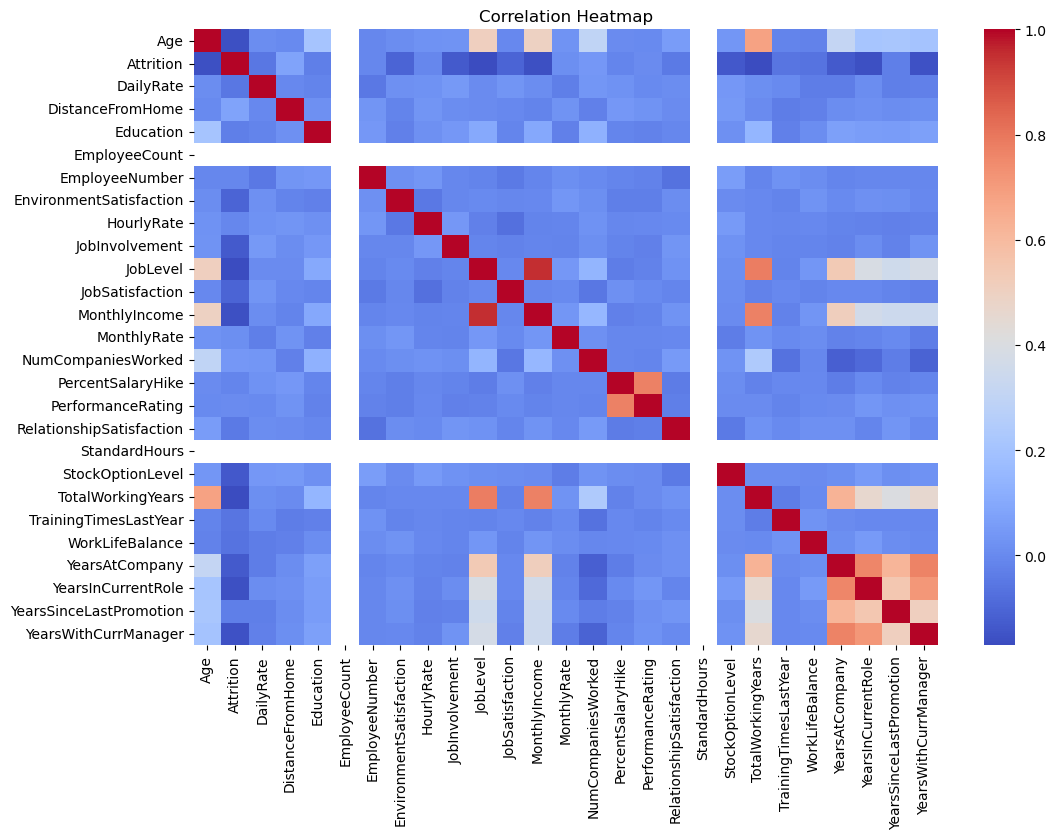

In [61]:
# Only numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")

# Save the plot before showing or clearing it
plt.savefig('/Users/sanikapoyekar/employee-attrition-prediction/images/Correlation_Heatmap.png', bbox_inches='tight')

# Show plot
plt.show()


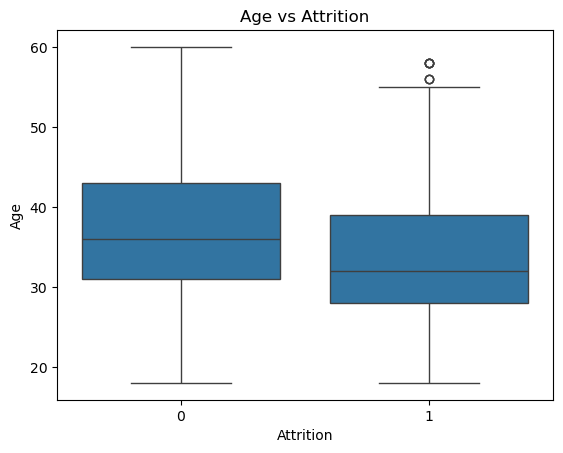

In [62]:
# Age vs Attrition
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title("Age vs Attrition")

# Save the plot before showing or clearing it
plt.savefig('/Users/sanikapoyekar/employee-attrition-prediction/images/Age_vs_Attrition.png', bbox_inches='tight')

# Show plot
plt.show()

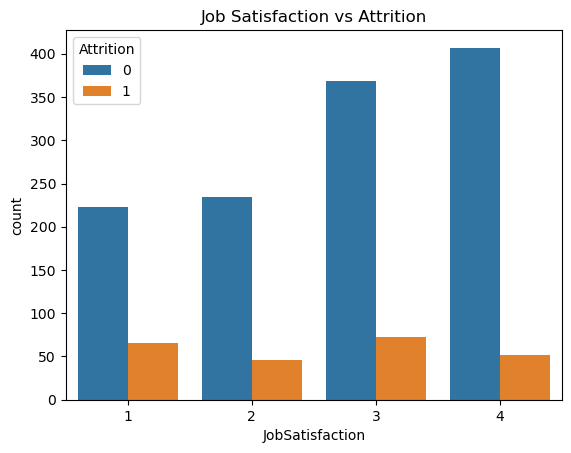

In [63]:
# JobSatisfaction vs Attrition
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title("Job Satisfaction vs Attrition")

# Save the plot before showing or clearing it
plt.savefig('/Users/sanikapoyekar/employee-attrition-prediction/images/JobSatisfaction_vs_Attrition.png', bbox_inches='tight')

# Show plot
plt.show()

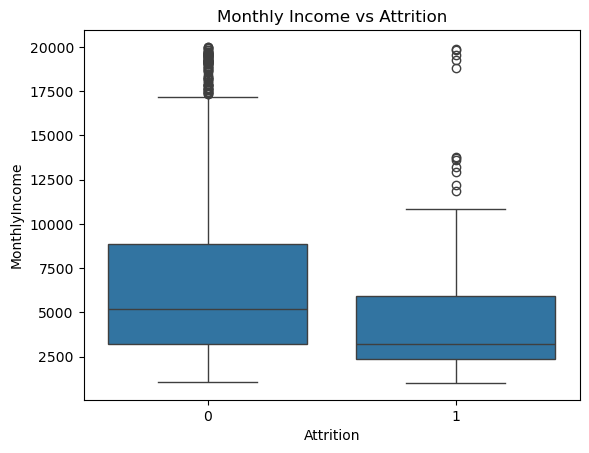

In [64]:
# MonthlyIncome vs Attrition
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income vs Attrition")

# Save the plot before showing or clearing it
plt.savefig('/Users/sanikapoyekar/employee-attrition-prediction/images/MonthlyIncome_vs_Attrition.png', bbox_inches='tight')

# Show plot
plt.show()

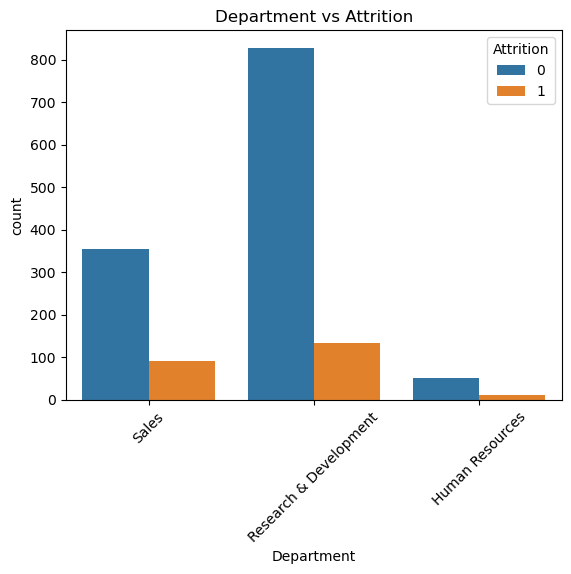

In [65]:
# Department vs Attrition
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title("Department vs Attrition")
plt.xticks(rotation=45)

# Save the plot before showing or clearing it
plt.savefig('/Users/sanikapoyekar/employee-attrition-prediction/images/Department_vs_Attrition.png', bbox_inches='tight')

# Show plot
plt.show()